In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib


In [2]:
import matplotlib.cm as cm 

In [7]:
from adjustText import adjust_text

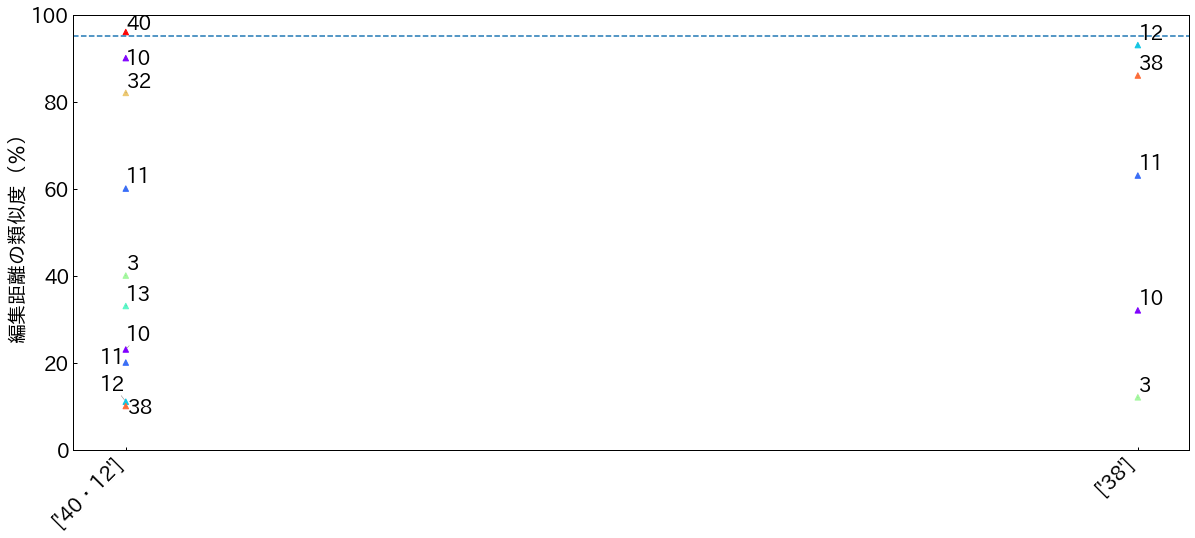

In [128]:
ratios = [[0.96,0.82,0.33,0.23,0.20,0.11,0.1,0.6,0.9,0.4],[0.93,0.86,0.63,0.32,0.12]]
true = [["40・12"],["38"]]
predicts = [["40","32","13","10","11","12","38","11","10","3"],["12","38","11","10","3"]]
index_ = [0,1]

labels = sorted(set([iii for i in predicts for ii in i for iii in ii.split("・")]))
colors = cm.rainbow(np.linspace(0, 1, len(labels)))

colors_dic = {}
for i in range(len(labels)):
    colors_dic[labels[i]] = colors[i] 

plt.rcParams['xtick.direction'] = 'in'#x軸の目盛線が内向き('in')か外向き('out')か双方向か('inout')
plt.rcParams['ytick.direction'] = 'in'#y軸の目盛線が内向き('in')か外向き('out')か双方向か('inout')
plt.rcParams['xtick.major.width'] = 1.0#x軸主目盛り線の線幅
plt.rcParams['ytick.major.width'] = 1.0#y軸主目盛り線の線幅
plt.rcParams['font.size'] = 20 #フォントの大きさ
plt.rcParams['axes.linewidth'] = 1.0 # 軸の線幅edge linewidth。囲みの太さ

fig, ax = plt.subplots(figsize=(20, 8))
#plt.figure(figsize=(10, 8))
# adjustTextに渡すテキストラベルのリスト
texts = []

for i in range(len(index_)):
    plt.scatter( [i+1 for ii in range(len(ratios[index_[i]]))], [ii*100 for ii in ratios[index_[i]]], s=30, marker = "^",color =[colors_dic[ii] for ii in predicts[index_[i]]])
    for ii in range(len(ratios[index_[i]])):
        plt_text = ax.annotate(predicts[index_[i]][ii],xy = (i+1,ratios[index_[i]][ii]*100) )
        texts.append(plt_text)
adjust_text(texts, arrowprops=dict(arrowstyle='-', color='gray', lw=0.5))
plt.axhline(y=95, xmin =0, xmax=len(index_), linestyle = "dashed")
plt.ylim(0,100,10)
ax.set_xticks([ii+1 for ii in range(len(index_))])
ax.set_xticklabels([true[i] for i in index_], rotation=45, ha = "right")

plt.xlabel("")
plt.ylabel("編集距離の類似度（％）")
plt.show()

In [21]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score

thr = 0.5
for thr in range(1,100,5):
    p = 0
    for i in range(len(ratios)):
        pred = "・".join(sorted(set([predicts[i][ii] for ii in range(len(ratios[i])) if ratios[i][ii] >= thr])))
        if true[i] == pred:
            p = 1
        y_pred.append(p)



y_true = [0, 0, 0, 0, 0, 1, 1, 1, 1, 1]
y_pred = [0, 1, 1, 1, 1, 0, 0, 0, 1, 1]


print(precision_score(y_true, y_pred))
print(recall_score(y_true, y_pred))
print(accuracy_score(y_true, y_pred))

0.3333333333333333
0.4
0.3


In [30]:
from sklearn.metrics import multilabel_confusion_matrix

In [98]:
ratios = [[0.96,0.82,0.33,0.23,0.20,0.11,0.1,0.6,0.9,0.4],[0.83,0.96,0.63,0.32,0.12]]
true = [["40・12"],["38"]]
predicts = [["40","32","13","10","11","12","38","11","10","3"],["12","38","11","10","3"]]

label_list = sorted(set([pred2 for pred in predicts for pred2 in pred]))
acc,recall,precision = [],[],[]
y_preds, y_trues = [], []
for thr in range(1,100,10):
    y_pred,y_true = [],[]
    for i in range(len(ratios)):
        pred_list = [0]*len(label_list)
        true_list = [0]*len(label_list)
        pred = []
        for ii in range(len(ratios[i])):
            if (ratios[i][ii]*100) >= thr:
                pred.append(predicts[i][ii])
        pred = set(pred)
        for iii,l in enumerate(label_list):
            if l in pred:
                pred_list[iii] = 1
            if l in sorted(set(true[i][0].split("・"))):
                true_list[iii] = 1
        y_pred.append(pred_list)
        y_true.append(true_list)
    
    y_preds.append(y_pred)
    y_trues.append(y_true)
    acc.append(accuracy_score(y_true, y_pred))
    recall.append(recall_score(y_true, y_pred, average="micro"))
    precision.append(precision_score(y_true, y_pred, average="micro"))

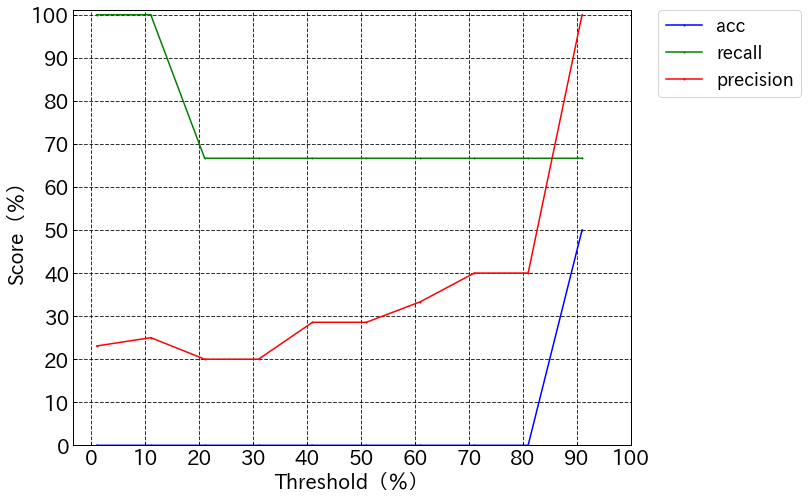

In [96]:

plt.rcParams['xtick.direction'] = 'in'#x軸の目盛線が内向き('in')か外向き('out')か双方向か('inout')
plt.rcParams['ytick.direction'] = 'in'#y軸の目盛線が内向き('in')か外向き('out')か双方向か('inout')
plt.rcParams['xtick.major.width'] = 1.0#x軸主目盛り線の線幅
plt.rcParams['ytick.major.width'] = 1.0#y軸主目盛り線の線幅
plt.rcParams['font.size'] = 20 #フォントの大きさ
plt.rcParams['axes.linewidth'] = 1.0 # 軸の線幅edge linewidth。囲みの太さ

fig, ax = plt.subplots(figsize=(10, 8))
#plt.figure(figsize=(10, 8))
# adjustTextに渡すテキストラベルのリスト
texts = []

#for i in range(len(acc)):
plt.plot([i for i in range(1,100,10)], [a*100 for a in acc], color = "b",marker='.',markersize=2,label = "acc")
plt.plot([i for i in range(1,100,10)], [a*100 for a in recall], color = "g",marker='.',markersize=2,label = "recall")
plt.plot([i for i in range(1,100,10)], [a*100 for a in precision], color = "r",marker='.',markersize=2,label = "precision")
    
plt.ylim(0,101,10)
ax.set_xticks([i for i in range(0,101,10)])
ax.set_yticks([i for i in range(0,101,10)])
ax.grid(which = "major", axis = "y", color = "black", alpha = 0.8,linestyle = "--", linewidth = 1)
ax.grid(which = "major", axis = "x", color = "black", alpha = 0.8,linestyle = "--", linewidth = 1)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=18)
plt.xlabel("Threshold（％）")
plt.ylabel("Score（％）")
plt.show()

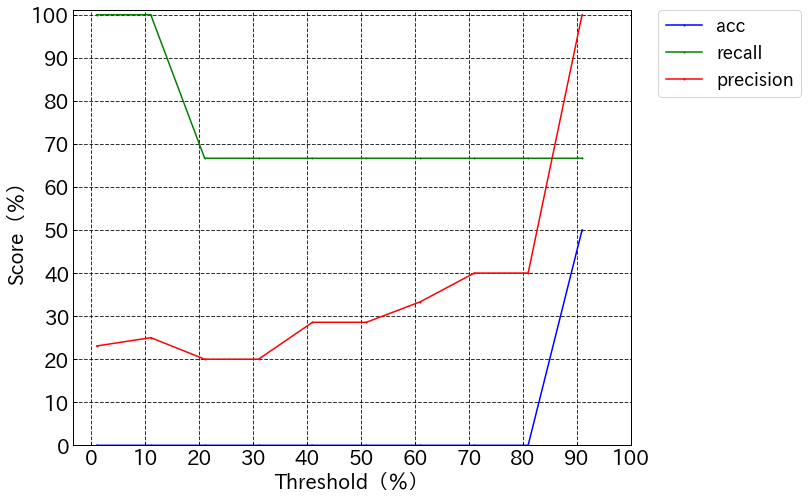

In [101]:

plt.rcParams['xtick.direction'] = 'in'#x軸の目盛線が内向き('in')か外向き('out')か双方向か('inout')
plt.rcParams['ytick.direction'] = 'in'#y軸の目盛線が内向き('in')か外向き('out')か双方向か('inout')
plt.rcParams['xtick.major.width'] = 1.0#x軸主目盛り線の線幅
plt.rcParams['ytick.major.width'] = 1.0#y軸主目盛り線の線幅
plt.rcParams['font.size'] = 20 #フォントの大きさ
plt.rcParams['axes.linewidth'] = 1.0 # 軸の線幅edge linewidth。囲みの太さ

fig, ax = plt.subplots(figsize=(10, 8))
#plt.figure(figsize=(10, 8))
# adjustTextに渡すテキストラベルのリスト
texts = []

plt.plot([i for i in range(1,100,10)], [accuracy_score(y_trues[i],y_preds[i])*100 for i in range(len(y_preds))], color = "b",marker='.',markersize=2,label = "acc")
plt.plot([i for i in range(1,100,10)], [recall_score(y_trues[i],y_preds[i], average="micro")*100 for i in range(len(y_preds))], color = "g",marker='.',markersize=2,label = "recall")
plt.plot([i for i in range(1,100,10)], [precision_score(y_trues[i],y_preds[i], average="micro")*100 for i in range(len(y_preds))], color = "r",marker='.',markersize=2,label = "precision")

plt.ylim(0,101,10)
ax.set_xticks([i for i in range(0,101,10)])
ax.set_yticks([i for i in range(0,101,10)])
ax.grid(which = "major", axis = "y", color = "black", alpha = 0.8,linestyle = "--", linewidth = 1)
ax.grid(which = "major", axis = "x", color = "black", alpha = 0.8,linestyle = "--", linewidth = 1)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=18)
plt.xlabel("Threshold（％）")
plt.ylabel("Score（％）")
plt.show()

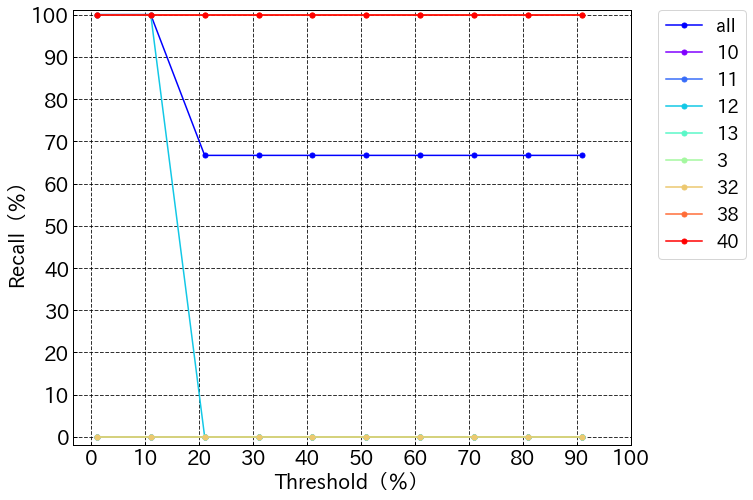

In [126]:
colors = cm.rainbow(np.linspace(0, 1, len(labels)))

plt.rcParams['xtick.direction'] = 'in'#x軸の目盛線が内向き('in')か外向き('out')か双方向か('inout')
plt.rcParams['ytick.direction'] = 'in'#y軸の目盛線が内向き('in')か外向き('out')か双方向か('inout')
plt.rcParams['xtick.major.width'] = 1.0#x軸主目盛り線の線幅
plt.rcParams['ytick.major.width'] = 1.0#y軸主目盛り線の線幅
plt.rcParams['font.size'] = 20 #フォントの大きさ
plt.rcParams['axes.linewidth'] = 1.0 # 軸の線幅edge linewidth。囲みの太さ

fig, ax = plt.subplots(figsize=(10, 8))
#plt.figure(figsize=(10, 8))
# adjustTextに渡すテキストラベルのリスト
texts = []

plt.plot([i for i in range(1,100,10)], [recall_score(y_trues[i],y_preds[i], average="micro")*100 for i in range(len(y_preds))], color = "b",marker='.',markersize=10,label = "all")

for ii in range(len(label_list)):
    plt.plot([i for i in range(1,100,10)], [recall_score(y_trues[i],y_preds[i],average = None)[ii]*100 for i in range(len(y_preds))], color = colors[ii],marker='.',markersize=10,label = label_list[ii])
    #plt.plot([i for i in range(1,100,10)], [precision_score(y_trues[i],y_preds[i],average = None)[ii]*100 for i in range(len(y_preds))], color = "r",marker='.',markersize=2,label = label_list[ii]+"_precision")

plt.ylim(-2,101,10)
ax.set_xticks([i for i in range(0,101,10)])
ax.set_yticks([i for i in range(0,101,10)])
ax.grid(which = "major", axis = "y", color = "black", alpha = 0.8,linestyle = "--", linewidth = 1)
ax.grid(which = "major", axis = "x", color = "black", alpha = 0.8,linestyle = "--", linewidth = 1)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=18)
plt.xlabel("Threshold（％）")
plt.ylabel("Recall（％）")
plt.show()

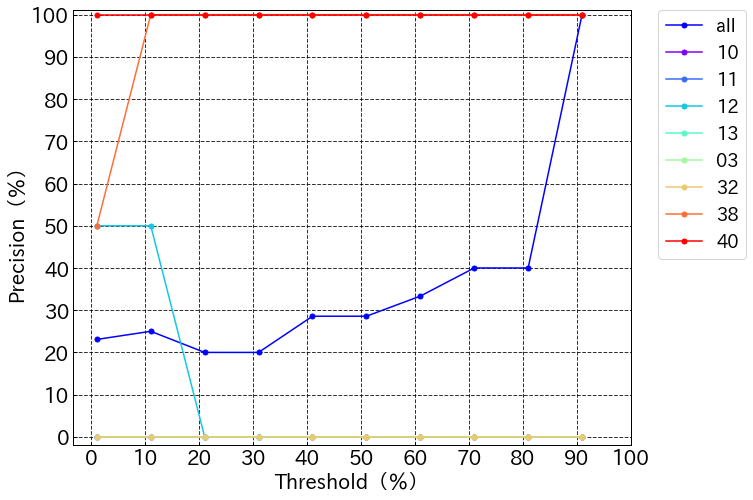

In [127]:
colors = cm.rainbow(np.linspace(0, 1, len(labels)))

plt.rcParams['xtick.direction'] = 'in'#x軸の目盛線が内向き('in')か外向き('out')か双方向か('inout')
plt.rcParams['ytick.direction'] = 'in'#y軸の目盛線が内向き('in')か外向き('out')か双方向か('inout')
plt.rcParams['xtick.major.width'] = 1.0#x軸主目盛り線の線幅
plt.rcParams['ytick.major.width'] = 1.0#y軸主目盛り線の線幅
plt.rcParams['font.size'] = 20 #フォントの大きさ
plt.rcParams['axes.linewidth'] = 1.0 # 軸の線幅edge linewidth。囲みの太さ

fig, ax = plt.subplots(figsize=(10, 8))
#plt.figure(figsize=(10, 8))
# adjustTextに渡すテキストラベルのリスト
texts = []

plt.plot([i for i in range(1,100,10)], [precision_score(y_trues[i],y_preds[i], average="micro")*100 for i in range(len(y_preds))], color = "b",marker='.',markersize=10,label = "all")

for ii in range(len(label_list)):
    #plt.plot([i for i in range(1,100,10)], [recall_score(y_trues[i],y_preds[i],average = None)[ii]*100 for i in range(len(y_preds))], color = colors[ii],marker='.',markersize=2,label = label_list[ii]+"_recall")
    plt.plot([i for i in range(1,100,10)], [precision_score(y_trues[i],y_preds[i],average = None)[ii]*100 for i in range(len(y_preds))],  color = colors[ii],marker='.',markersize=10,label = label_list[ii].zfill(2))

plt.ylim(-2,101,10)
ax.set_xticks([i for i in range(0,101,10)])
ax.set_yticks([i for i in range(0,101,10)])
ax.grid(which = "major", axis = "y", color = "black", alpha = 0.8,linestyle = "--", linewidth = 1)
ax.grid(which = "major", axis = "x", color = "black", alpha = 0.8,linestyle = "--", linewidth = 1)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=18)
plt.xlabel("Threshold（％）")
plt.ylabel("Precision（％）")
plt.show()